# 2. Decision Tree Classifier 

Decision Tree merupakan salah satu algoritma yang masuk kedalam Supervised Learning. Algoritma Decision Tree adalah algoritma klasifikasi yang membagi dataset menjadi beberapa cabang untuk mempermudah pengambilan keputusan. Bisa dikatakan algoritma ini hampir mirip dengan flow chart dengan struktur if-else condition.
Pada Algoritma ini terdapat beberapa bagian antara lain yaitu:
<br>-Root Node
<br>-Internal Node
<br>-Edge
<br>-Leaf Node

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from utilities import visualize_classifier

* **import numpy** digunakan untuk memanggil library numpy yang berfungsi untuk mengolah array, matriks, dan linear aljabar. 
* **matplotlib** adalah library pada python yang digunakan untuk memvisualisasikan data
* **sklearn** atau scikit-learn adalah library pada python yang digunakan dalam machine learning. Library ini banyak memuat model-model machine learning. Dalam kasus kali ini digunakan model **DecisionTreeClassifier**.
* Pada program ini juga digunakan **train_test_split** untuk memecah dataset menjadi dua bagian, yaitu data yang digunakan untuk training dan data yang digunakan untuk melakukan test. Kedua data ini perlu dibedakan untuk melakukan pengujian pada model. Dengan menggunakan data training model akan mempelajari pola klasfikasinya dan dengan menggunakan data test model akan mencoba menerapkan pola yang telah dipelajari untuk mengklasifikasikan data. 
* Pemilihan Node pada Decision Tree didasarkan pada data yang memiliki Entropy atau Gini Index dengan nilai terbaik.
* **classification_report** digunakan untuk melihat performa dari model yang telah kita buat. Mulai dari Precission, Recall, f1-score dan Accuracy.

In [2]:
# Load input data
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

* Perintah diatas merupakan perintah untuk mendefinisikan data yang akan digunakan sebagai masukan bagi model.
* Data yang digunakan adalah **data_decision_trees.txt**
* Data ini kemudian dipecah menjadi dua bagian yaitu **X** dan **y**, pemecahan ini menggunakan teknik **slicing array**. **X** mengambil data dari index 0 - dengan -2 yang akan digunakan sebagai predictor(variabel independent). Sedangkan **y** akan mengambil data dengan index -1 yang digunakan sebagai target(variabel dependen).

In [3]:
# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

* Data **X** kemudian dipecah lagi menjadi 2 bagian berdasarkan labelnya. Yaitu data **class_0** dengan nilai label **y = 0** dan data **class_1** dengan nilai label **y = 1**. 
* Pemecahan ini dilakukan agar mempermudah pengambilan keputusan untuk tiap-tiap percabangan.

C:\Users\Aldi Riza\AppData\Local\Temp\ipykernel_13140\3606243706.py:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',


Text(0.5, 1.0, 'Input data')

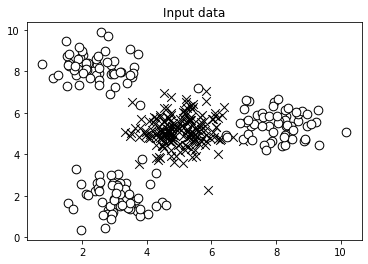

In [4]:
# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
        edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
        edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

* Visualisasi menggunakan scatter plot diatas menggambarkan sebaran/distribusi data dengan label 0 dan 1. Label 0 digambarkan dengan **X** dan label 1 digambarkan dengan **o**.
* Dapat dilihat bahwa persebaran data dengan label 0 lebih mengumpul ditengah, sedangkan data dengan label 1 lebih banyak menyebar disekitar data berlabel 0. 

In [5]:
# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=5)

* Pada perintah **train_test_split** diatas data **X** dan **y** akan displit/dibagi menjadi **data train** dan **data test**. Data test memiliki ratio 25% dari keseluruhan data, sedangkan 75% sisanya akan digunakan sebagai data training.
* Pada listing juga digunakan **random_state = 5**, hal ini dimaksudkan agar data dipecah secara random dan tidak berurutan yang bertujuan untuk mengindari pola data yang monoton dan dapat menyebabkan terjadinya overfit.

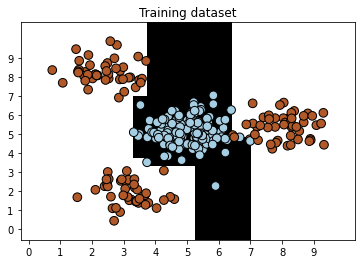

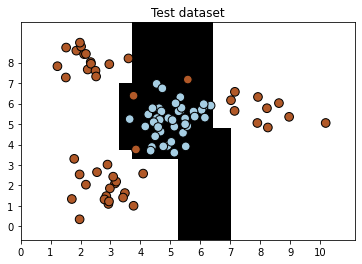

In [6]:
# Decision Trees classifier 
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

* Pada program diatas dilakukan training terhadap model dengan menggunakan data training **X_train** dan **y_train**. Data **X_train** digunakan sebagai prediktor dan **y_train** digunakan sebagai targetnya. 
* Setelah dilakukan training, kemudian dilakukan testing model menggunakan data set **X_test** dan **y_test**.
* Hasil Training dan test ini kemudian dilakukan visualisasi untuk melihat batasan antara label 0 dan label 1. Dapat telihat disini, daerah yang hitam merupakan daerah klasifikasi dari label bernilai 0 dan daerah berwarna putih adalah daerah klasifikasi dari label bernilai 1. 
* Jika melihat perbandingan hasil Training dan hasil Test diatas, bisa dikatakan model sudah mengklasifikasikan dengan baik.

In [7]:
# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

########################################



* Setelah model selesai melewati tahapan Training dan Testing, selanjutnya dilakukan pengecekan performa dari model dengan melihat nilai Precission, Recall, F1-Score dan Accuracynya. 
* Precision menggambarkan seberapa besar accuracy dari sebuah model dalam melakukan klasifikasi secara benar dan recall mengacu pada jumlah items yang diklasifikasikan dengan benar dari keseluruhan items. F1-Score adalah rata-rata harmonik dai Precission dan Recall yang menggambarkan keseimbangan performa dari precission dan recall itu sendiri.
* Pada model decision tree yang dibuat ini, nilai Precission dan Recall nya sudah sangat bagus bahkan mendakati nilai 1. Dengan nilai tersebut bisa dikatakan bahwa model ini dapat mengklasifikasikan data dengan sempurna.